In [1]:
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

shp_fp = r"C:\Users\julia\Downloads\Community Districts.zip!geo_export_6a985844-199c-43ae-8c22-d6191be21c94.shp"

pm25 = pd.read_excel(r"C:\Users\julia\Downloads\pm25databyCD.xlsx")

cds = gpd.read_file(shp_fp)

merged = cds.set_index('boro_cd').join(pm25.set_index('boro_cd'))
merged.rename(columns={"2020 Mean Fine Particulate Matter (PM2.5) (mcg per cubic meter)": "pm25"}, inplace=True)
onlyr = merged.dropna(subset = ["pm25"])
onlyr.head()


,shape_area,shape_leng,geometry,pm25,cd_name
boro_cd,,,,,
308.0,4.560379e+07,38232.886649,"POLYGON ((-73.95829 40.67983, -73.95596 40.679...",6.31,Crown Heights and Prospect Heights (CD8)
205.0,3.831698e+07,29443.048056,"POLYGON ((-73.89138 40.86170, -73.89142 40.861...",6.21,Fordham and University Heights (CD5)
311.0,1.032083e+08,51534.144746,"POLYGON ((-73.97299 40.60881, -73.97296 40.608...",5.85,Bensonhurst (CD11)
410.0,1.720774e+08,105822.376914,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",5.79,South Ozone Park and Howard Beach (CD10)
203.0,4.479644e+07,33500.036938,"POLYGON ((-73.88072 40.83752, -73.88074 40.837...",6.22,Morrisania and Crotona (CD3)


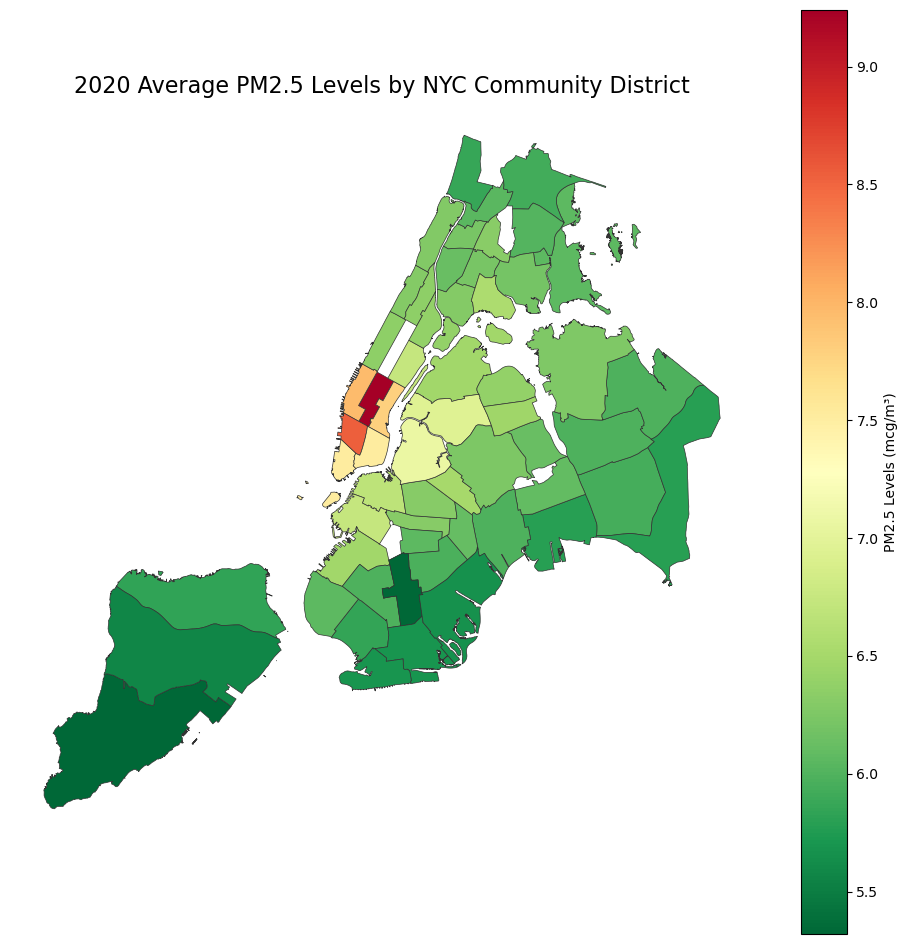

In [2]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title("2020 Average PM2.5 Levels by NYC Community District",
             fontdict={'fontsize': '16', 'fontweight' : '4'})
fig = onlyr.plot(column='pm25', cmap='RdYlGn_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True, 
                legend_kwds={'label': "PM2.5 Levels (mcg/m³)", 'orientation': 'vertical'})

plt.savefig('pm25byCD')